# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Import all necessary Libraries

In [1]:
import pandas as pd
import requests
import numpy as np
import tweepy
import glob
from tweepy import OAuthHandler
import json
from timeit import default_timer as Timer
import matplotlib.pyplot as plt

2. Read the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

3. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(data.content)
    
df_img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

4. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [71]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = Timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = Timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
10

Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
18

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

5. Read the tweet_json.txt file

In [66]:
df_list = []

for twitter_line in open('tweet_json.txt', mode='r'):
    df_twitter = json.loads(twitter_line)
    df_list.append({'tweet_id':df_twitter['id_str'],
                   'retweet_count':df_twitter['retweet_count'],
                   'favorite_count':df_twitter['favorite_count']})
df_twitter = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Archive Dataframe

In [67]:
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [68]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
df_archive[df_archive['text'].str.contains('http', case=True)]['text'].value_counts()

This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj                     1
This is Oscar. He's a world renowned snowball inspector. It's a ruff job but someone has to do it. 10/10 great guy https://t.co/vSufMAKm3C                              1
THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA                                1
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW                            1
This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV                                             1
This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq                              

In [70]:
df_archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [71]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [72]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [73]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [74]:
df_img_pred['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [75]:
df_archive[df_archive['name'].str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
not              2
getting          2
actually         2
all              1
such             1
life             1
by               1
old              1
my               1
his              1
light            1
this             1
space            1
infuriating      1
officially       1
unacceptable     1
incredibly       1
Name: name, dtype: int64

In [76]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Image Prediction Dataframe

In [77]:
df_img_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [78]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API Dataframe

In [79]:
df_twitter.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7066           34095
1  892177421306343426           5341           29587
2  891815181378084864           3510           22282
3  891689557279858688           7279           37266
4  891327558926688256           7810           35617

In [80]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [81]:
df_twitter.tweet_id.duplicated().value_counts()

False    2327
Name: tweet_id, dtype: int64

## Issues

1. **Wrong Dog Names:**
    - *Quality Issue*
> The `name` column contains wrong data, like `a`, `the`, `quite`, and `getting`. These are obviously no dog names.
2. **Wrong Type:**
    - *Quality Issue*
> The Archive `tweet_id` column is an `integer`. It should be a `string` / `object`.

3. **Wrong Type:**
    - *Quality Issue*
> The Image Prediction `tweet_id` column is an `integer`. It should be a `string` / `object`.
4. **Missing Data:**
    - *Quality Issue*
> In `expanded_urls` column is missing data.
5. **Too much of Information:**
    - *Tidiness Issue*
> In the `text` column there are text strings and url strings.
6. **Wrong Type:**
    - *Quality Issue*
> The `timestamp` is not a `datetime` type, for future analysis this is necessary.
7. **Duplicates:**
    - *Quality*
> There are duplicates in `jpg_url`.
8. **Not consistent Format:**
    - *Quality*
> The `p1`, `p2`, and `p3` columns don't share the same formation.
9. **Not necessary Columns:**
    - *Tidiness*
> The columns `doggo`, `floofer`, `pupper`, and `puppo` are not necessary, because they only store one dog stage per row.
10. **Seperated Dataframes:**
    - *Tidiness*
> It's not necessary that the Archive, the Image Prediction, and the Twitter dataframes are seperated in 3 single dataframes.
11. **Confusing Rating System:**
    - *Quality*
> The `rating_denominator` should be the same number. And in the `rating_numerator` are outliers.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [114]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
img_pred_clean = df_img_pred.copy()
twitter_clean = df_twitter.copy()

### Issue #1:

#### Define:

* *Quality Issue*
* There are wrong dog names in the `name` column. We have to set it to `None`

#### Code

In [115]:
archive_clean['name'] = archive_clean['name'].replace(archive_clean[archive_clean['name'].str.islower()]['name'], 'None')

#### Test

In [116]:
archive_clean['name'].value_counts()

None         854
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
Bailey         7
Toby           7
Daisy          7
Buddy          7
Leo            6
Koda           6
Milo           6
Dave           6
Jax            6
Jack           6
Oscar          6
Stanley        6
Rusty          6
Scout          6
Bella          6
Louis          5
Chester        5
Phil           5
Gus            5
            ... 
Lambeau        1
Chadrick       1
Swagger        1
Jo             1
Bertson        1
Rontu          1
Bloop          1
Edgar          1
Fwed           1
Bowie          1
Kota           1
Kallie         1
Meera          1
Tito           1
Murphy         1
Dallas         1
Angel          1
Oreo           1
Mojo           1
Hubertson      1
Trigger        1
Gustaf         1
Jeb            1
Sunshine       1
Vinnie         1
Brooks         1
Ralphie        1
Alejandro     

### Issue #2:

#### Define

* *Quality*
* We change the type of the `tweet_id` column from `int` to `str`

#### Code

In [117]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test

In [118]:
archive_clean['tweet_id'].describe()

count                   2356
unique                  2356
top       739932936087216128
freq                       1
Name: tweet_id, dtype: object

### Issue #3:

#### Define

* *Quality*
* We change the type of the `tweet_id` column from `int` to `str`

#### Code

In [119]:
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [120]:
img_pred_clean['tweet_id'].describe()

count                   2075
unique                  2075
top       668620235289837568
freq                       1
Name: tweet_id, dtype: object

### Issue #4:

#### Define

* *Quality*
* In the `expanded_urls` column is missing data. Therefore, we can not comprehend where the information come from. In this case we delete the rows with the missing data.

#### Code

In [121]:
archive_clean = archive_clean[pd.notnull(archive_clean['expanded_urls'])]

#### Test

In [122]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(2), o

### Issue #5:

#### Define

* *Tidiness*
* In the `text` column are 2 informations: url and string. We will split them and create a new column `text_url`

#### Code

In [123]:
# Create empty lists for both columns
column_text = []
column_url = []
# Splitting the text, remove the html, and fill the empty lists
for i in archive_clean['text']:
    column_text.append(' '.join(i.split(' ')[:-1]))
    column_url.append(i.split(' ')[-1])
# updating the text-column and create a new text_url column
archive_clean['text'] = column_text
column_url = pd.DataFrame(column_url, columns=['text_url'])
archive_clean = pd.concat([archive_clean, column_url], axis=1)

#### Test

In [124]:
archive_clean[['tweet_id', 'text', 'text_url']].head()

tweet_id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

                  text_url  
0  https://t.co/MgUWQ76dJU  
1  https://t.co/0Xxu71qeIV  
2  https://t.co/wUnZnhtVJB  
3  https://t.co/tD36da7qLQ  
4  https://t.co/AtUZn91f7f

### Issue #6:

#### Define

* *Quality*
* The `timestamp` column is not in a datetime format. In this case, we set the datetime to the YYYY-MM-DD format, if we want to analyze this data later.

#### Code

In [125]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format = '%Y-%m-%d')

#### Test

In [126]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null float64
rating_denominator            2297 non-null float64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
text_url           

### Issue #7:

#### Define

* *Quality*
* Delete the dublicates in `jpg_url`

#### Code

In [127]:
img_pred_clean = img_pred_clean.drop(img_pred_clean[img_pred_clean.duplicated(['jpg_url'])].index)

#### Test

In [128]:
img_pred_clean['jpg_url'].duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

### Issue #8:

#### Define

* *Quality*
* We format the breeds of the dogs in `p1`, `p2`, and `p3` in constant informations

#### Code

In [129]:
# Because we're lazy and don't want to write to much code, we use a function
def column_formatting (column):
    '''
    This function formats every word in lower case, replaces spaces and hyphen to underscores
    '''
    column = list(map(lambda x: x.lower(), column))
    column = list(map(lambda x: x.replace(' ', '_'), column))
    column = list(map(lambda x: x.replace('-', '_'), column))
    # Return the names lowercase, without space and hyphen
    return column

In [130]:
img_pred_clean['p1'] = column_formatting(img_pred_clean['p1'])
img_pred_clean['p2'] = column_formatting(img_pred_clean['p2'])
img_pred_clean['p3'] = column_formatting(img_pred_clean['p3'])

#### Test

In [131]:
img_pred_clean[['p1', 'p2', 'p3']].sample(10)

p1                     p2                        p3
751             eskimo_dog     norwegian_elkhound            siberian_husky
1985    labrador_retriever  flat_coated_retriever  chesapeake_bay_retriever
687                cheetah          arabian_camel                    jaguar
1923      golden_retriever     labrador_retriever                    saluki
790                bighorn                  hyena          mexican_hairless
1565  old_english_sheepdog     bedlington_terrier        kerry_blue_terrier
2073             chihuahua               pekinese                  papillon
1439          walker_hound                basenji              ibizan_hound
704     labrador_retriever       golden_retriever                      lion
309             park_bench           water_bottle                    beacon

### Issue #9:

#### Define

* *Tidiness*
* The columns `doggo`, `floofer`, `pupper`, and `puppo` will be merged into one single collum called `dog_stage`
* There are some dogs rated in multiple `dog_stage`s, they will be called `double_stager`
* We will drop the not necessary columns with all the other ones from the 9th. Issue

#### Code

In [132]:
# If we set the 'None' to an empty string, we don't have to remove it later for the visualization
dog_stage = archive_clean[['doggo','floofer','pupper','puppo']]
dog_stage = dog_stage.replace('None', '')
dog_list = np.array(dog_stage['doggo'])+np.array(dog_stage['floofer'])+np.array(dog_stage['pupper'])+np.array(dog_stage['puppo'])
# Set the multiple rated dogs to double_stager
dog_list[dog_list == 'doggopupper'] = 'double_stager'
dog_list[dog_list == 'doggopuppo'] = 'double_stager'
dog_list[dog_list == 'doggofloofer'] = 'double_stager'
archive_clean['dog_stage'] = pd.DataFrame(dog_list)

#### Test

In [133]:
archive_clean['dog_stage'].value_counts()

                 1922
pupper            243
doggo              80
puppo              28
double_stager      14
floofer             9
Name: dog_stage, dtype: int64

### Issue #10:

#### Define

* *Tidiness*
* All columns that will not be necessary will be dropped.
* This includes the following columns:
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`, `pupper`, and `puppo`

#### Code

In [134]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['retweeted_status_user_id'].isnull()]
archive_clean = archive_clean[archive_clean['retweeted_status_timestamp'].isnull()]
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], 1)

#### Test

In [155]:
archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name                 text_url dog_stage  
0                10.0   Phineas  https://t.co/MgUWQ76dJU            
1                10.0     Tilly  https://t.co/0Xxu71qeIV            
2                10.0    Archie  https://t.co/wUnZnhtVJB            
3                10.0     Darla  https://t.co/tD36da7qLQ            
4                10.0  Franklin  https://t.co/AtUZn91f7f

### Issue #11:

#### Define

* *Tidiness*
* 3 dataframes are not necessary. Therefore, we merge all together to one single dataframe, called `df_clean`

#### Code

In [156]:
df_clean = archive_clean.merge(twitter_clean, how='left', on='tweet_id')\
.merge(img_pred_clean, how='left', on='tweet_id')

#### Test

In [157]:
df_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name                 text_url dog_stage  ...    \
0                10.0   Phineas  https://t.co/MgUWQ76dJU            ...     
1                10.0     Tilly  https://t.co/0Xxu71qeIV            ...     
2                10.0    Archie  https://t.co/wUnZnhtVJB            ...     
3                10.0     Darla  https://t.co/tD36da7qLQ            ...     
4                10.0  Franklin  https://t.co/AtUZn91f7f            ...     

   img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
0      1.0       orange  0.097049   False               bagel  0.085851   
1      1.0    chihuahua  0.323581    True            pekinese  0.090647   
2      1.0    chihuahua  0.716012    True            malamute  0.078253   
3      1.0  paper_towel  0.170278   False  labrador_retriever  0.168086   
4      2.0       basset  0.555712    True    english_springer  0.225770   

  p2_dog                           p3   p3_conf p3_dog  
0  False                       banana  0.076110  False  
1   True                     papillon  0.068957   True  
2   True                       kelpie  0.031379   True  
3   True                      spatula  0.040836  False  
4   True  german_short_haired_pointer  0.175219   True  

[5 rows x 23 columns]

### Issue #12:

#### Define

* *Quality*
* The rating system may be unique, but it's also confusing. In this case, the numerator in the `text`colum is a decimal number. Therefore, we will set the type to `float` and implement a fair `rating` column

#### Code

In [158]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [159]:
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [160]:
df_clean['rating'] = df_clean['rating_numerator']/df_clean['rating_denominator']

#### Test

In [161]:
df_clean[['tweet_id', 'rating_numerator', 'rating_denominator', 'rating']].head()

tweet_id  rating_numerator  rating_denominator  rating
0  892420643555336193              13.0                10.0     1.3
1  892177421306343426              13.0                10.0     1.3
2  891815181378084864              12.0                10.0     1.2
3  891689557279858688              13.0                10.0     1.3
4  891327558926688256              12.0                10.0     1.2

In [162]:
df_clean['rating'].describe()

count    2117.000000
mean        1.169194
std         3.947247
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [163]:
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data

What we can do now with this this Dataframe?

### Dog Rating

Let's find out which dog the highest ranking has.
What is the Top 10?

In [174]:
df_clean['rating'].sort_values(ascending=False).head(10)

805     177.600000
1896     42.000000
559       7.500000
430       3.428571
618       2.700000
1534      2.600000
172       1.400000
231       1.400000
614       1.400000
21        1.400000
Name: rating, dtype: float64

**Let's see who is the goodest boy of all**

In [185]:
no_1 = df_clean['rating'].max()
df_clean[df_clean['rating']==no_1][['tweet_id', 'name', 'text', 'rating', 'jpg_url']]

tweet_id     name  \
805  749981277374128128  Atticus   

                                                  text  rating  \
805  This is Atticus. He's quite simply America af....   177.6   

                                             jpg_url  
805  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg

![Atticus](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

### Dog Breeds

What are the **top 10** #1 predicted dog breeds from the algorythm?

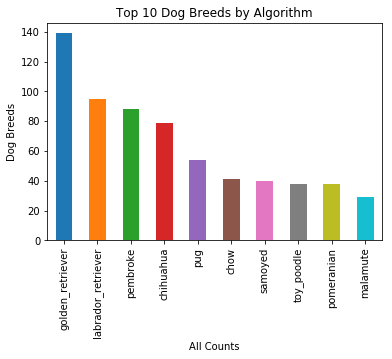

In [165]:
top_ten = df_clean['p1'].value_counts().head(10)
top_ten.plot(kind='bar')
plt.title('Top 10 Dog Breeds by Algorithm')
plt.xlabel('All Counts')
plt.ylabel('Dog Breeds')
plt.show();

### Dog Names

What are the most common names of the dogs?
In case of readability we limit the Names to 10.

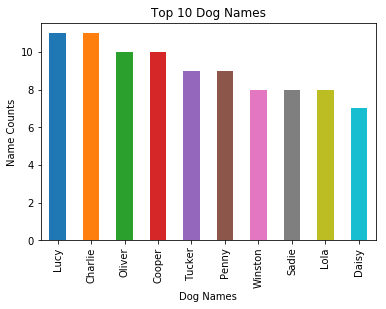

In [166]:
# We have much 'None' values in the name column, so we have to select all the other names
names_bar = df_clean[df_clean['name']!='None']['name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Dog Names')
plt.xlabel('Dog Names')
plt.ylabel('Name Counts')
plt.show()

### How many Dog Stages?

How often are the dogs calles doggo, floofer, pupper or puppo in percentage?

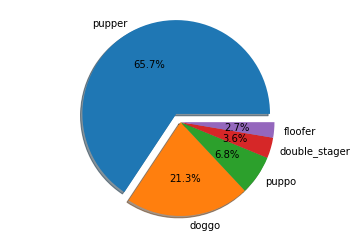

In [167]:
# In our data are empty strings, we have to get rid of them
stages = df_clean['dog_stage'].value_counts().index[1:]
values = df_clean['dog_stage'].value_counts().values[1:]
plt.pie(values, explode=[0.1,0,0,0,0], labels=stages, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show();

**We have way more pupper in our dataframe than all the other stages together. And we have more double_stager than floofer.**

### Which correlation do we have between the retweet count and the favorite count?

Let's pay some attention with a scatter plot.

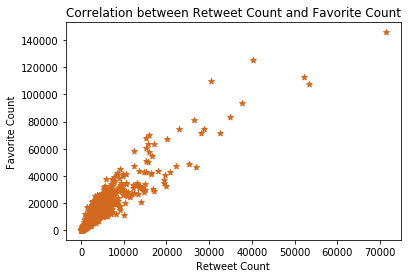

In [168]:
x = df_clean['retweet_count']
y = df_clean['favorite_count']

plt.scatter(x, y, marker='*', color='chocolate')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlation between Retweet Count and Favorite Count')
plt.show();

**In this case, there is a correlation between retweet counts and favorite counts.**